# Regression

Import the data

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

X, y = housing['data'], housing['target']
print(X.shape)
print(y.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(1460, 80)
(1460,)


In [2]:
# Keep only numerical type data
import numpy as np
X = X.select_dtypes(include= np.number)
print(X.shape)

(1460, 37)


In [3]:
## Removing rows with nan

#print(np.all(np.isnan(X), axis=0)) ## Chekcing whether all of them are nan

mask = np.any(np.isnan(X), axis=1)
X_new = X[~mask]
y_new = y[~mask]

print(X_new.shape)
print(y_new.shape)

(1121, 37)
(1121,)


### Plot

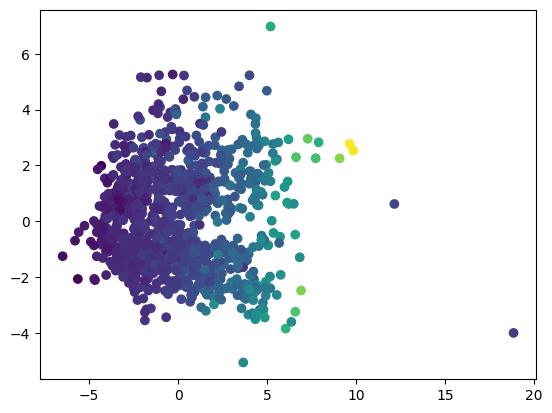

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X_new)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_new)
plt.show()

## Training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=1)

## Fit a linear regression model

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([-4.83464032e+02, -8.61234766e+03,  2.43769668e+02, -2.07829251e+03,
        2.76569768e+04,  5.20744230e+03,  8.87412877e+03,  2.53221924e+03,
        6.81657674e+03, -4.78478314e+17, -1.56139466e+17, -4.56714000e+17,
        4.55012314e+17,  1.04751784e+17,  1.17011378e+17,  1.17170916e+16,
       -1.43897975e+17,  6.43537356e+03,  8.01577268e+02,  3.03743445e+03,
       -5.26551719e+01, -7.88427812e+03, -4.67883692e+03,  7.27520263e+03,
        3.60073855e+03, -2.46430529e+03,  1.20906814e+04,  2.49320298e+03,
        2.71874690e+03, -1.07723060e+03, -9.09141719e+01,  6.26407052e+02,
        4.12607905e+03, -2.75645659e+03, -1.99124253e+02, -7.82715996e+02,
       -4.60615237e+02])

5.387318558096996e-06


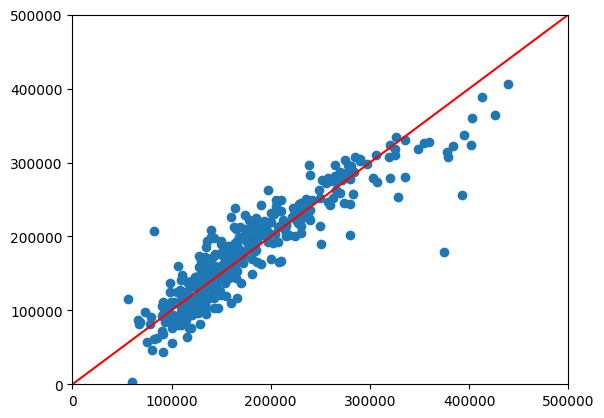

In [8]:
y_pred_LS = reg.predict(X_test)
RMSPE_reg = np.sqrt(np.mean((y_test - y_pred_LS) ** 2)) / np.var(y_test)
print(RMSPE_reg)

plot = plt.scatter(y_test, y_pred_LS)

plt.xlim((0, 500000)) # restricts x axis from 0 to 25
plt.ylim((0, 500000)) # restricts x axis from 0 to 25
plt.plot([0, 500000], [0, 500000], c='r') # plots line y = x

plt.show()

## LASSO - do it yourself

# GBM

In [11]:
from sklearn import ensemble

GBM = ensemble.GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error', warm_start=True)
GBM.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=0,
                          warm_start=True)

4.8584246095029366e-06


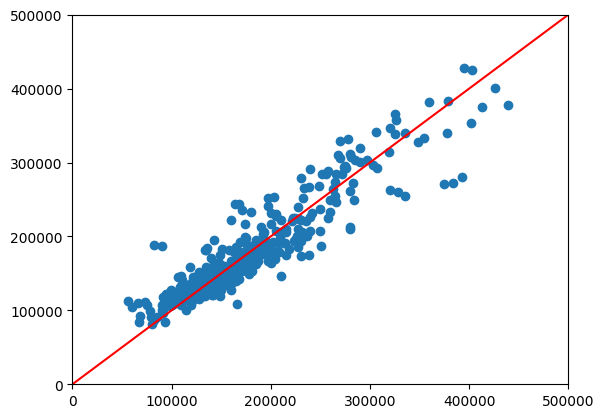

In [12]:
y_pred_GBM = GBM.predict(X_test)
RMSPE_GBM = np.sqrt(np.mean((y_test - y_pred_GBM) ** 2)) / np.var(y_test)
print(RMSPE_GBM)

plot = plt.scatter(y_test, y_pred_GBM)
plt.xlim((0, 500000)); plt.ylim((0, 500000)); plt.plot([0, 500000], [0, 500000], c='r')
plt.show()

You can try other methods such as linear_model.HuberRegressor, Gaussian Process Regression

# Classification

In [13]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

# https://scikit-learn.org/stable/datasets/real_world.html


winedata = load_iris()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_test)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0
 0 0]


In [15]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(random_state=0)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

print(y_pred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2 1 2 1 1 1 0 0 1 0 2 0 0 1 1 2 0 2 0 1 2 0 2 2 2
 2 1 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 1 1 0 0 1 0 0 2 1 0
 0 0]


[[38  0  0]
 [ 0 36  2]
 [ 0  3 34]]


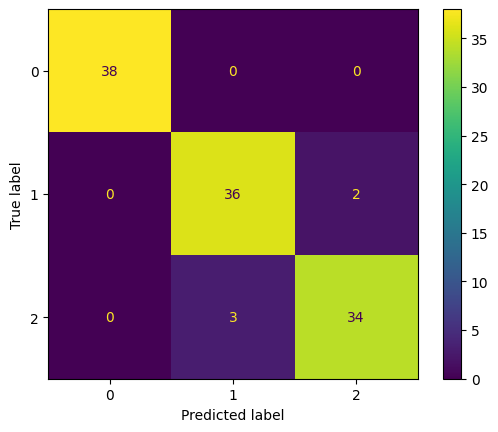

0.9557522123893806


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# clf.predict_proba(X_test)
print(clf1.score(X_test, y_test))

In [17]:
from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(random_state=1, max_iter=1000)
clf2.fit(X_train, y_train)

clf2.predict_proba(X_test)
y_pred = clf2.predict(X_test)
print(clf2.score(X_test, y_test))

print(confusion_matrix(y_test, y_pred))

0.9469026548672567
[[38  0  0]
 [ 0 34  4]
 [ 0  2 35]]


### Ensemble methods - skip now

In [18]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import VotingClassifier

# eclf = VotingClassifier(estimators=[('lr', clf1), ('mlp', clf2)], voting='hard')

# for clf, label in zip([clf1, clf2, eclf], ['Logistic Regression', 'MLP', 'Ensemble']):
#   scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
#   print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [19]:
## WHY? - skip for now
# eclf.fit(X_train, y_train)  

# y_pred = eclf.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(eclf.score(X_test, y_test))


# More Neural Network, simple version (not using dataloaders, from arrays)

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


Make the model

In [21]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(4, 3)
        self.relu1 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        logits = self.relu1(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear1): Linear(in_features=4, out_features=3, bias=True)
  (relu1): ReLU()
)


Check

In [22]:
tmp_X = torch.tensor(X_train[0:2,], dtype=torch.float32)
model(tmp_X)

tensor([[0.0000, 0.0000, 1.3389],
        [0.0000, 0.2381, 0.0000]], grad_fn=<ReluBackward0>)

Optimizer

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

Transforming the numpy type to torch type

In [24]:
## Check why this mismatch???
data_x = torch.tensor(X_train, dtype=torch.float32).to(device)
data_y = torch.tensor(y_train, dtype=torch.long).to(device)
data_x_test = torch.tensor(X_test, dtype=torch.float32).to(device)
data_y_test = torch.tensor(y_test, dtype=torch.long).to(device)

In [25]:
for epoch in range(200):
  optimizer.zero_grad()
  output = model(data_x)
  loss = criterion(output, data_y)
  loss.backward()
  optimizer.step()

  print("Loss at epoch", epoch, loss.item())

Loss at epoch 0 1.1088840961456299
Loss at epoch 1 1.0323134660720825
Loss at epoch 2 0.9788547158241272
Loss at epoch 3 0.9366840720176697
Loss at epoch 4 0.8947209715843201
Loss at epoch 5 0.8461920022964478
Loss at epoch 6 0.7878695130348206
Loss at epoch 7 0.7329389452934265
Loss at epoch 8 0.6836630702018738
Loss at epoch 9 0.6413496732711792
Loss at epoch 10 0.6045726537704468
Loss at epoch 11 0.5721887350082397
Loss at epoch 12 0.5437265038490295
Loss at epoch 13 0.5179131627082825
Loss at epoch 14 0.49544864892959595
Loss at epoch 15 0.4748987853527069
Loss at epoch 16 0.4565400779247284
Loss at epoch 17 0.4394705891609192
Loss at epoch 18 0.42442217469215393
Loss at epoch 19 0.4107683002948761
Loss at epoch 20 0.395860880613327
Loss at epoch 21 0.3813377022743225
Loss at epoch 22 0.3677031695842743
Loss at epoch 23 0.3549073040485382
Loss at epoch 24 0.3430415987968445
Loss at epoch 25 0.33197611570358276
Loss at epoch 26 0.32172003388404846
Loss at epoch 27 0.3122797906398773

In [26]:
model.eval()
y_pred = model(data_x_test.to(device))

print((np.array(y_pred.argmax(1)) == y_test).mean())

0.9646017699115044
